In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/sensor_farming_data_balanced.csv')

In [ ]:
df.head(10)

,temperature,humidity,pressure,light,distance,angle,acceleration,suitable_for_farming
0,38.334874,40.307115,999.848898,595.499733,112.703084,73.582390,2.962340,0
1,21.791788,38.921065,962.483087,157.438469,58.672096,65.335316,6.877094,0
2,28.074256,73.451020,989.096522,339.953984,118.145126,42.610357,0.410199,1
3,34.161746,31.220776,959.341079,537.402494,170.577986,84.257982,7.025875,0
4,32.527829,81.574966,1048.689420,341.740642,44.864676,73.741916,4.963113,0
5,14.814745,77.271758,1031.325001,408.528301,185.679424,25.223911,5.748749,0
6,38.307194,48.285762,1035.426726,369.289374,137.002267,42.853559,4.112602,0
7,21.694442,57.306471,979.437457,193.663226,61.058592,0.881641,5.756588,0
8,39.010045,54.217358,1013.507579,746.979595,28.870294,68.352915,0.879341,0
9,18.007425,22.676675,1042.373104,631.667654,185.766275,12.822564,9.469301,0


In [ ]:
df.describe()

,temperature,humidity,pressure,light,distance,angle,acceleration,suitable_for_farming
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.075792,54.632932,998.266074,557.408397,106.149636,46.037152,5.040030,0.106000
std,8.703799,19.821027,29.260986,256.119568,55.703188,25.562071,2.821869,0.307992
min,10.001257,20.013733,950.282908,100.655898,10.084425,0.127057,0.101726,0.000000
25%,17.690001,38.516802,972.112111,343.507485,56.766614,24.250903,2.618834,0.000000
50%,25.327161,54.717101,998.637979,565.792059,107.221176,46.358962,5.101143,0.000000
75%,32.601431,71.627207,1024.228886,780.292572,154.811931,67.982578,7.450429,0.000000
max,39.983986,89.882447,1049.933671,999.228169,199.908290,89.988319,9.946901,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature           1000 non-null   float64
 1   humidity              1000 non-null   float64
 2   pressure              1000 non-null   float64
 3   light                 1000 non-null   float64
 4   distance              1000 non-null   float64
 5   angle                 1000 non-null   float64
 6   acceleration          1000 non-null   float64
 7   suitable_for_farming  1000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


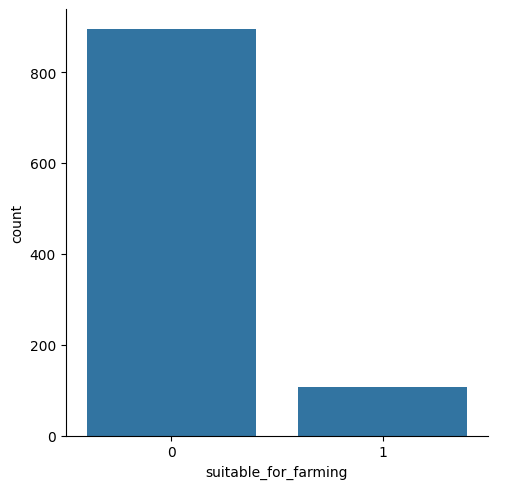

In [ ]:
sns.catplot(x='suitable_for_farming', data=df, kind='count')

In [ ]:
corr = df.corr()

<Axes: >

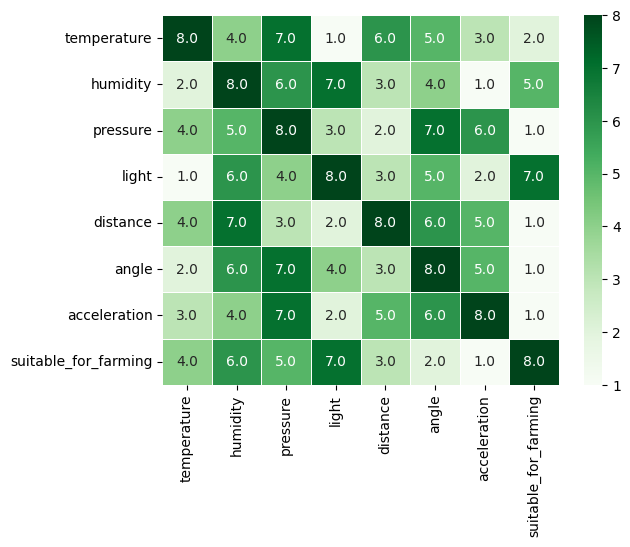

In [ ]:
sns.heatmap(corr.rank(axis='columns'), annot=True,fmt='.1f',linewidth=.5, cmap="Greens")

In [ ]:
X = df.drop('suitable_for_farming', axis=1)
y = df['suitable_for_farming']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Algorithm = ['RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','LogisticRegression','Naive Bayes','XGBoost']
Accuracy=[]

In [ ]:
def algorithm(model):
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  accuracy = accuracy_score(y_test,prediction)

  print('confusion matrix')
  cm = confusion_matrix(y_test,prediction)


  group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()


  print('Normalized confusion matrix')
  cm1 = confusion_matrix(y_test,prediction, normalize='true')

  group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in cm1.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cm1.flatten()/np.sum(cm1)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()

  print(cm)
  print(classification_report(y_test,prediction))
  final_score = accuracy*100
  print('accuracy_score : ' , final_score)

  Accuracy.append(accuracy*100)

confusion matrix


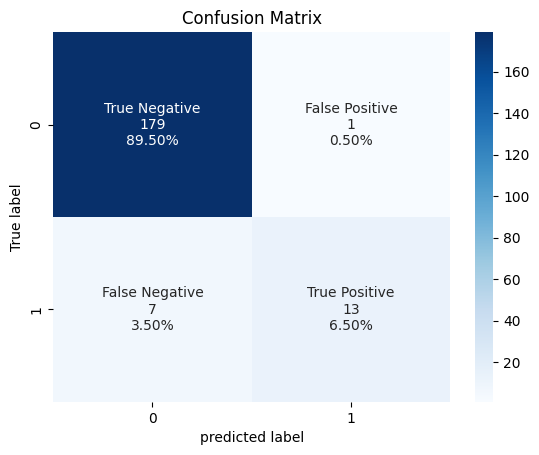

Normalized confusion matrix


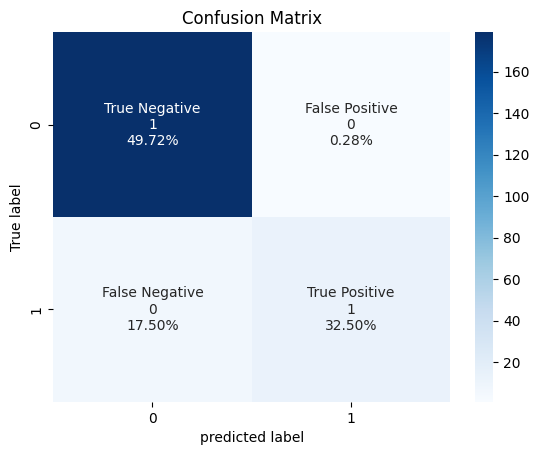

[[179   1]
 [  7  13]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       180
           1       0.93      0.65      0.76        20

    accuracy                           0.96       200
   macro avg       0.95      0.82      0.87       200
weighted avg       0.96      0.96      0.96       200

accuracy_score :  96.0


In [ ]:
model_1 = RandomForestClassifier(n_estimators=100)
algorithm(model_1)

confusion matrix


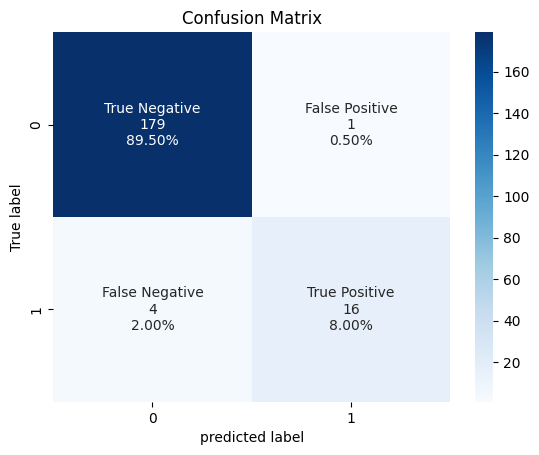

Normalized confusion matrix


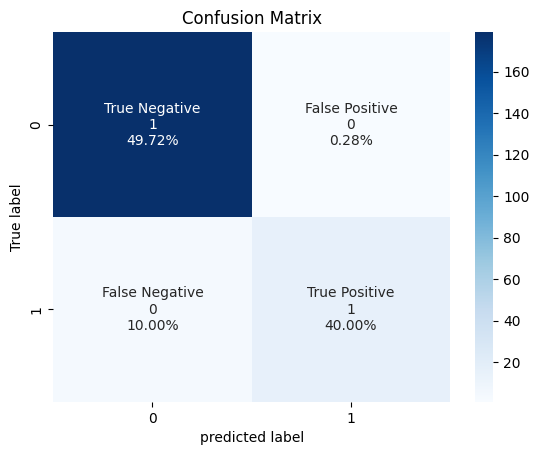

[[179   1]
 [  4  16]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       180
           1       0.94      0.80      0.86        20

    accuracy                           0.97       200
   macro avg       0.96      0.90      0.93       200
weighted avg       0.97      0.97      0.97       200

accuracy_score :  97.5


In [ ]:
model_2 = DecisionTreeClassifier(random_state=42)
algorithm(model_2)

confusion matrix


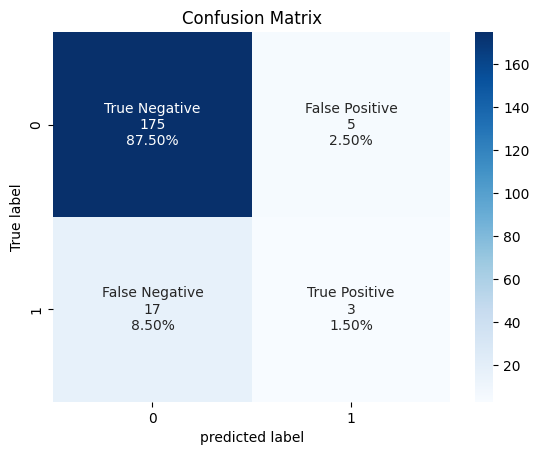

Normalized confusion matrix


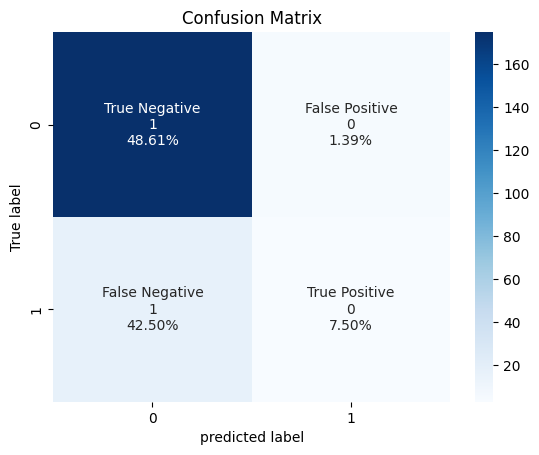

[[175   5]
 [ 17   3]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       180
           1       0.38      0.15      0.21        20

    accuracy                           0.89       200
   macro avg       0.64      0.56      0.58       200
weighted avg       0.86      0.89      0.87       200

accuracy_score :  89.0


In [ ]:
model_3 = KNeighborsClassifier(n_neighbors=2)
algorithm(model_3)

confusion matrix


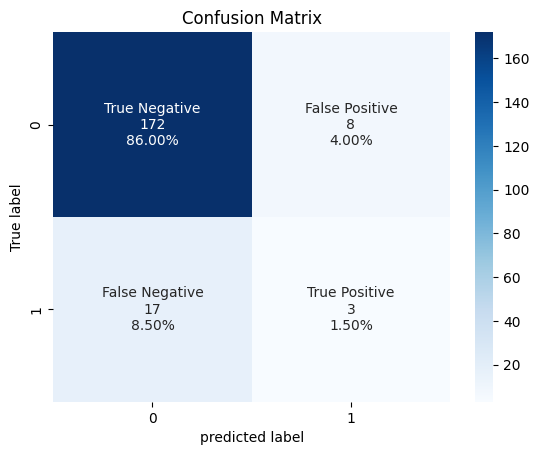

Normalized confusion matrix


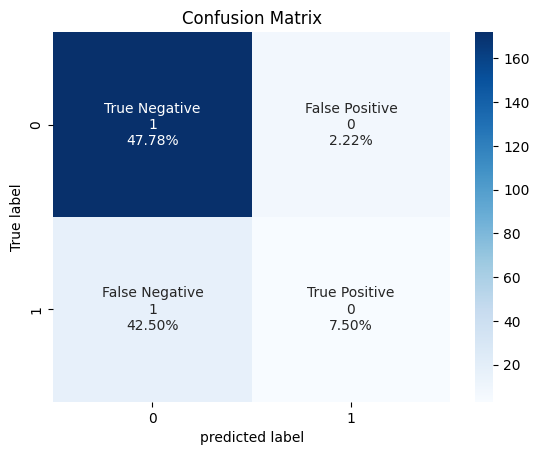

[[172   8]
 [ 17   3]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       180
           1       0.27      0.15      0.19        20

    accuracy                           0.88       200
   macro avg       0.59      0.55      0.56       200
weighted avg       0.85      0.88      0.86       200

accuracy_score :  87.5


In [ ]:
model_4 = LogisticRegression()
algorithm(model_4)

confusion matrix


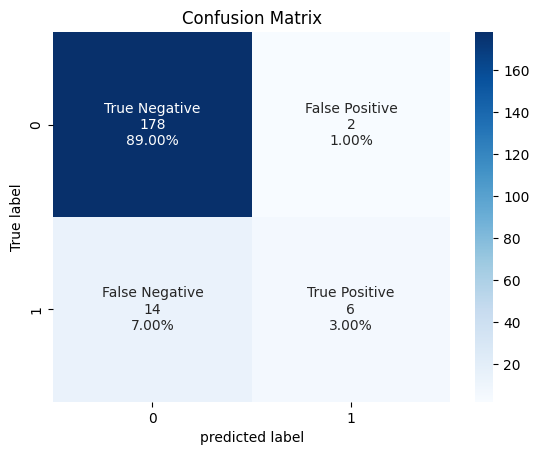

Normalized confusion matrix


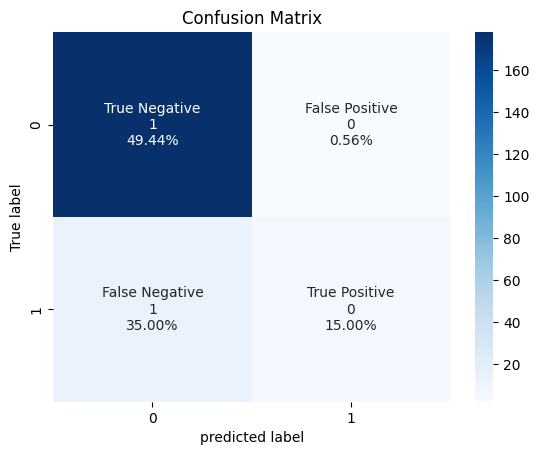

[[178   2]
 [ 14   6]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       180
           1       0.75      0.30      0.43        20

    accuracy                           0.92       200
   macro avg       0.84      0.64      0.69       200
weighted avg       0.91      0.92      0.90       200

accuracy_score :  92.0


In [ ]:
model_5 = GaussianNB()
algorithm(model_5)

confusion matrix


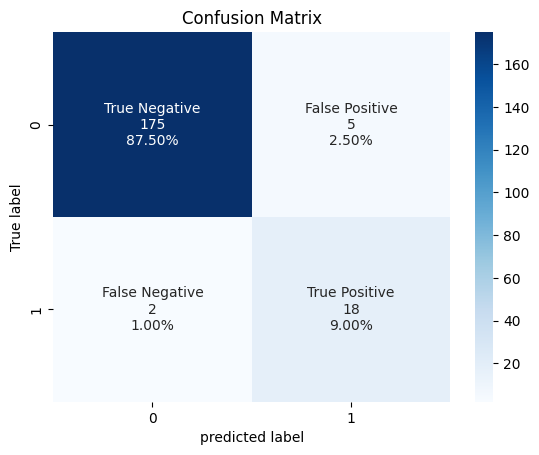

Normalized confusion matrix


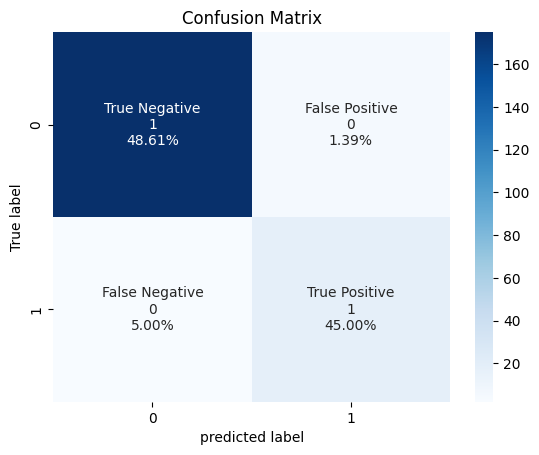

[[175   5]
 [  2  18]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       180
           1       0.78      0.90      0.84        20

    accuracy                           0.96       200
   macro avg       0.89      0.94      0.91       200
weighted avg       0.97      0.96      0.97       200

accuracy_score :  96.5


In [ ]:
model_6 = xgb.XGBClassifier()
algorithm(model_6)

In [ ]:
score = pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy })
score

,Algorithm,Accuracy
0,RandomForestClassifier,96.0
1,DecisionTreeClassifier,97.5
2,KNeighborsClassifier,89.0
3,LogisticRegression,87.5
4,Naive Bayes,92.0
5,XGBoost,96.5


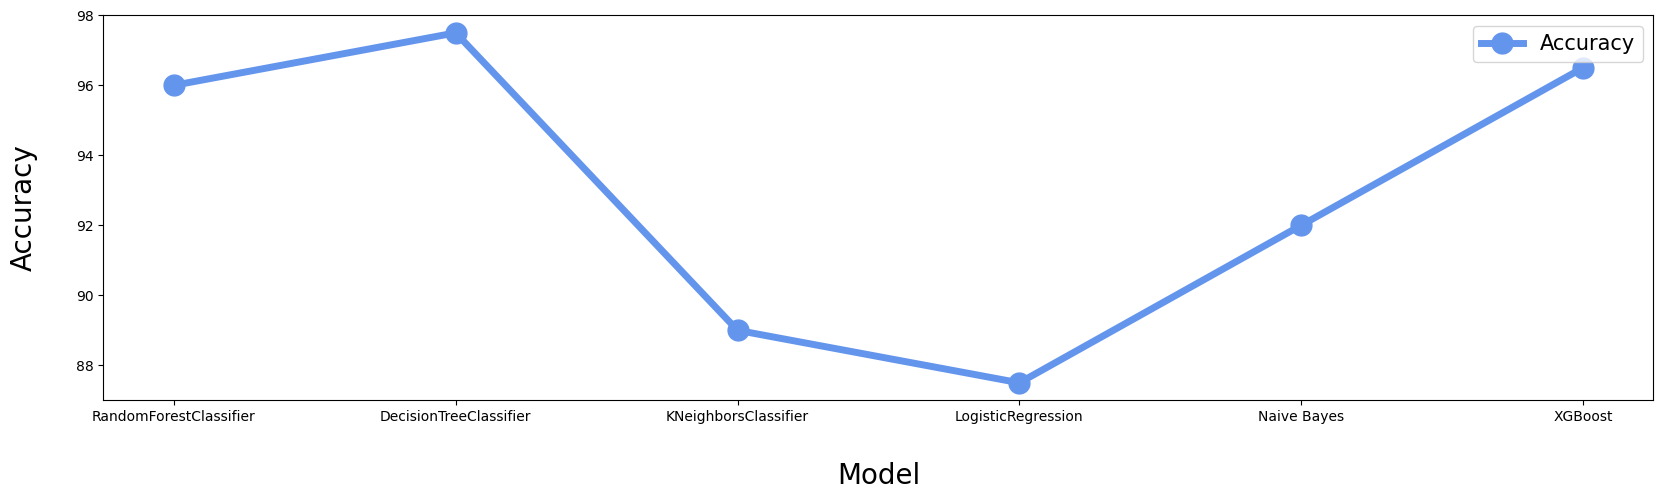

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(score.Algorithm,score.Accuracy,label='Accuracy',lw=5,color='CornflowerBlue',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.xlabel('\nModel',fontsize= 20)
plt.ylabel('Accuracy\n',fontsize= 20)
plt.show()

In [ ]:
test_input = [[28.5, 65, 1010, 600, 50, 30, 3.5]]

In [ ]:
prediction = model_1.predict(test_input)

In [ ]:
prediction

array([1])

In [ ]:
test_inputt = [[5, 95, 1055, 100, 250, 60, 8.0]]

In [ ]:
prediction = model_1.predict(test_inputt)

In [ ]:
prediction

array([0])

In [ ]:
import pickle

In [ ]:
with open('suitable_for_farming_model.pkl', 'wb') as file:
    pickle.dump(model_1, file)